In [1]:
import pandas as pd

# Load the data
data = pd.read_csv ('H1.csv')

# Select relevant columns
columns_to_use = ['Calcination Time (min)', 'Calcination Temp (C)', 'Reaction Temp (C)', 'Reaction Time (min)', 'Biodiesel Yield (%)']
data = data[columns_to_use]

# Display the first few rows
print(data.head())


   Calcination Time (min)  Calcination Temp (C)  Reaction Temp (C)  \
0                     120                   500                 55   
1                     240                   500                 55   
2                     120                   700                 55   
3                     240                   700                 55   
4                     120                   500                 65   

   Reaction Time (min)  Biodiesel Yield (%)  
0                   60                70.54  
1                   80                74.22  
2                   80                78.67  
3                   60                68.13  
4                   80                68.80  


In [2]:
# Bounds for variables
bounds = {
    'Calcination Time (min)': (120, 240),   # Example bounds
    'Calcination Temp (C)': (500, 700),
    'Reaction Temp (C)': (55, 65),
    'Reaction Time (min)': (60, 80)
}

In [3]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

In [4]:
# Separate features and target
X = data.drop('Biodiesel Yield (%)', axis=1)
y = data['Biodiesel Yield (%)']

# Fit a regression model (e.g., Random Forest)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [5]:
def evaluate(individual):
    # Prepare the input for prediction
    input_data = np.array(individual).reshape(1, -1)
    # Predict biodiesel yield
    predicted_yield = model.predict(input_data)
    return (predicted_yield[0],)  # Return as a tuple

In [25]:
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Blending crossover
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [30]:
# Ensure mutated individuals stay within bounds
def checkBounds(mins, maxs):
    def decorator(func):
        def wrapper(*args, **kargs):
            offspring = func(*args, **kargs)
            for child in offspring:
                for i in range(len(child)):
                    if child[i] < mins[i]:
                        child[i] = mins[i]
                    elif child[i] > maxs[i]:
                        child[i] = maxs[i]
            return offspring
        return wrapper
    return decorator

# Extract bounds
mins = [bounds[key][0] for key in bounds]
maxs = [bounds[key][1] for key in bounds]

# Apply the decorator to the genetic operators
toolbox.decorate("mate", checkBounds(mins, maxs))
toolbox.decorate("mutate", checkBounds(mins, maxs))

TypeError: list indices must be integers or slices, not tuple

gen	avg    	max    
0  	2.43532	5.43506
1  	3.03831	6.43522
2  	3.7572 	6.43522
3  	4.42449	8.74113
4  	5.23292	9.37589
5  	6.48187	12.2025
6  	8.10616	13.4658
7  	9.26768	13.4658
8  	10.9972	16.307 
9  	12.4962	16.0532
10 	13.5492	18.4974
11 	14.8656	20.4625
12 	16.7004	26.6516
13 	19.7747	28.7539
14 	22.0637	32.2332
15 	24.3646	32.4302
16 	26.9482	36.1442
17 	29.3474	37.6908
18 	31.9497	45.4059
19 	34.8415	50.387 
20 	37.803 	52.6499
21 	41.1191	59.8051
22 	45.8976	59.8051
23 	50.1742	63.9769
24 	54.9284	72.2145
25 	59.3375	72.1075
26 	63.4463	75.5932
27 	68.2723	84.6226
28 	73.1196	91.8254
29 	77.5049	91.8254
30 	81.5438	95.0082
31 	85.1419	99.9926
32 	89.79  	100.794
33 	93.9372	108.16 
34 	97.1492	113.961
35 	101.561	117.591
36 	107.223	121.951
37 	112.568	128.262
38 	116.73 	128.262
39 	119.617	130.364
40 	121.825	136.208
41 	126.127	141.684
42 	130.839	142.348
43 	135.407	152.012
44 	140.553	159.392
45 	146.112	160.873
46 	150.24 	162.981
47 	155.911	174.931
48 	161.428	182.914


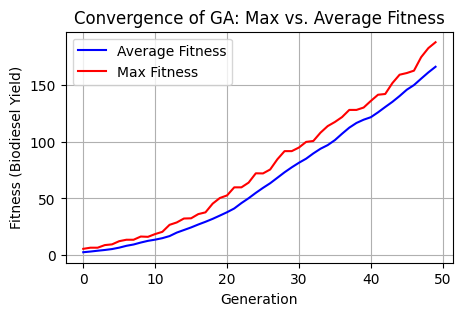

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Initialize the Genetic Algorithm components
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    return sum(individual),  # Fitness function (simple example)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize the population and logbook
population = toolbox.population(n=100)
logbook = tools.Logbook()
logbook.header = ['gen', 'avg', 'max']

# Define statistics to log
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("max", np.max)

# Genetic Algorithm settings
NGEN = 50  # Number of generations
CXPB, MUTPB = 0.7, 0.2  # Crossover and mutation probabilities

# Run the Genetic Algorithm
for gen in range(NGEN):
    # Select the next generation individuals
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    
    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the offspring with invalid fitnesses
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Replace population with the new offspring
    population[:] = offspring

    # Record statistics for this generation
    record = stats.compile(population)
    logbook.record(gen=gen, **record)
    print(logbook.stream)

# After the GA, logbook contains the progress data
# Let's visualize the convergence

gen = logbook.select("gen")
avg = logbook.select("avg")
max_ = logbook.select("max")

# Plot the convergence of the algorithm
plt.figure(figsize=(5, 3))
plt.plot(gen, avg, label="Average Fitness", color="blue")
plt.plot(gen, max_, label="Max Fitness", color="red")
plt.xlabel("Generation")
plt.ylabel("Fitness (Biodiesel Yield)")
plt.title("Convergence of GA: Max vs. Average Fitness")
plt.legend()
plt.grid(True)
plt.show()

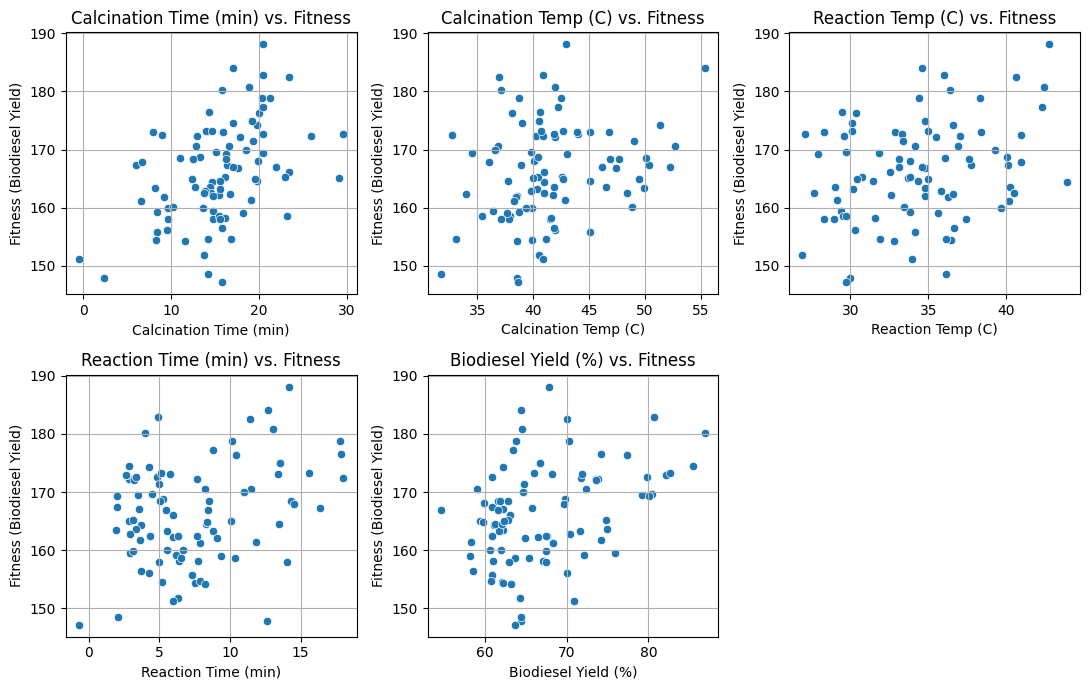

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the parameters and fitness values from the population
population_params = [ind for ind in population]
fitness_scores = [ind.fitness.values[0] for ind in population]

# Ensure the number of param_names matches the size of individuals
# Add the correct number of parameter names according to your GA's parameter count
param_names = ['Calcination Time (min)', 'Calcination Temp (C)', 'Reaction Temp (C)', 'Reaction Time (min)', 'Biodiesel Yield (%)']  # Add more if needed

# Convert to DataFrame for easy plotting
df_results = pd.DataFrame(population_params, columns=param_names)
df_results['fitness'] = fitness_scores

# Plot individual parameters vs. fitness
plt.figure(figsize=(11, 7))

for i, col in enumerate(param_names):
    plt.subplot(2, 3, i+1)  # Adjust to fit number of subplots based on param_names
    sns.scatterplot(x=df_results[col], y=df_results['fitness'])
    plt.title(f'{col} vs. Fitness')
    plt.xlabel(col)
    plt.ylabel('Fitness (Biodiesel Yield)')
    plt.grid(True)

plt.tight_layout()
plt.show()

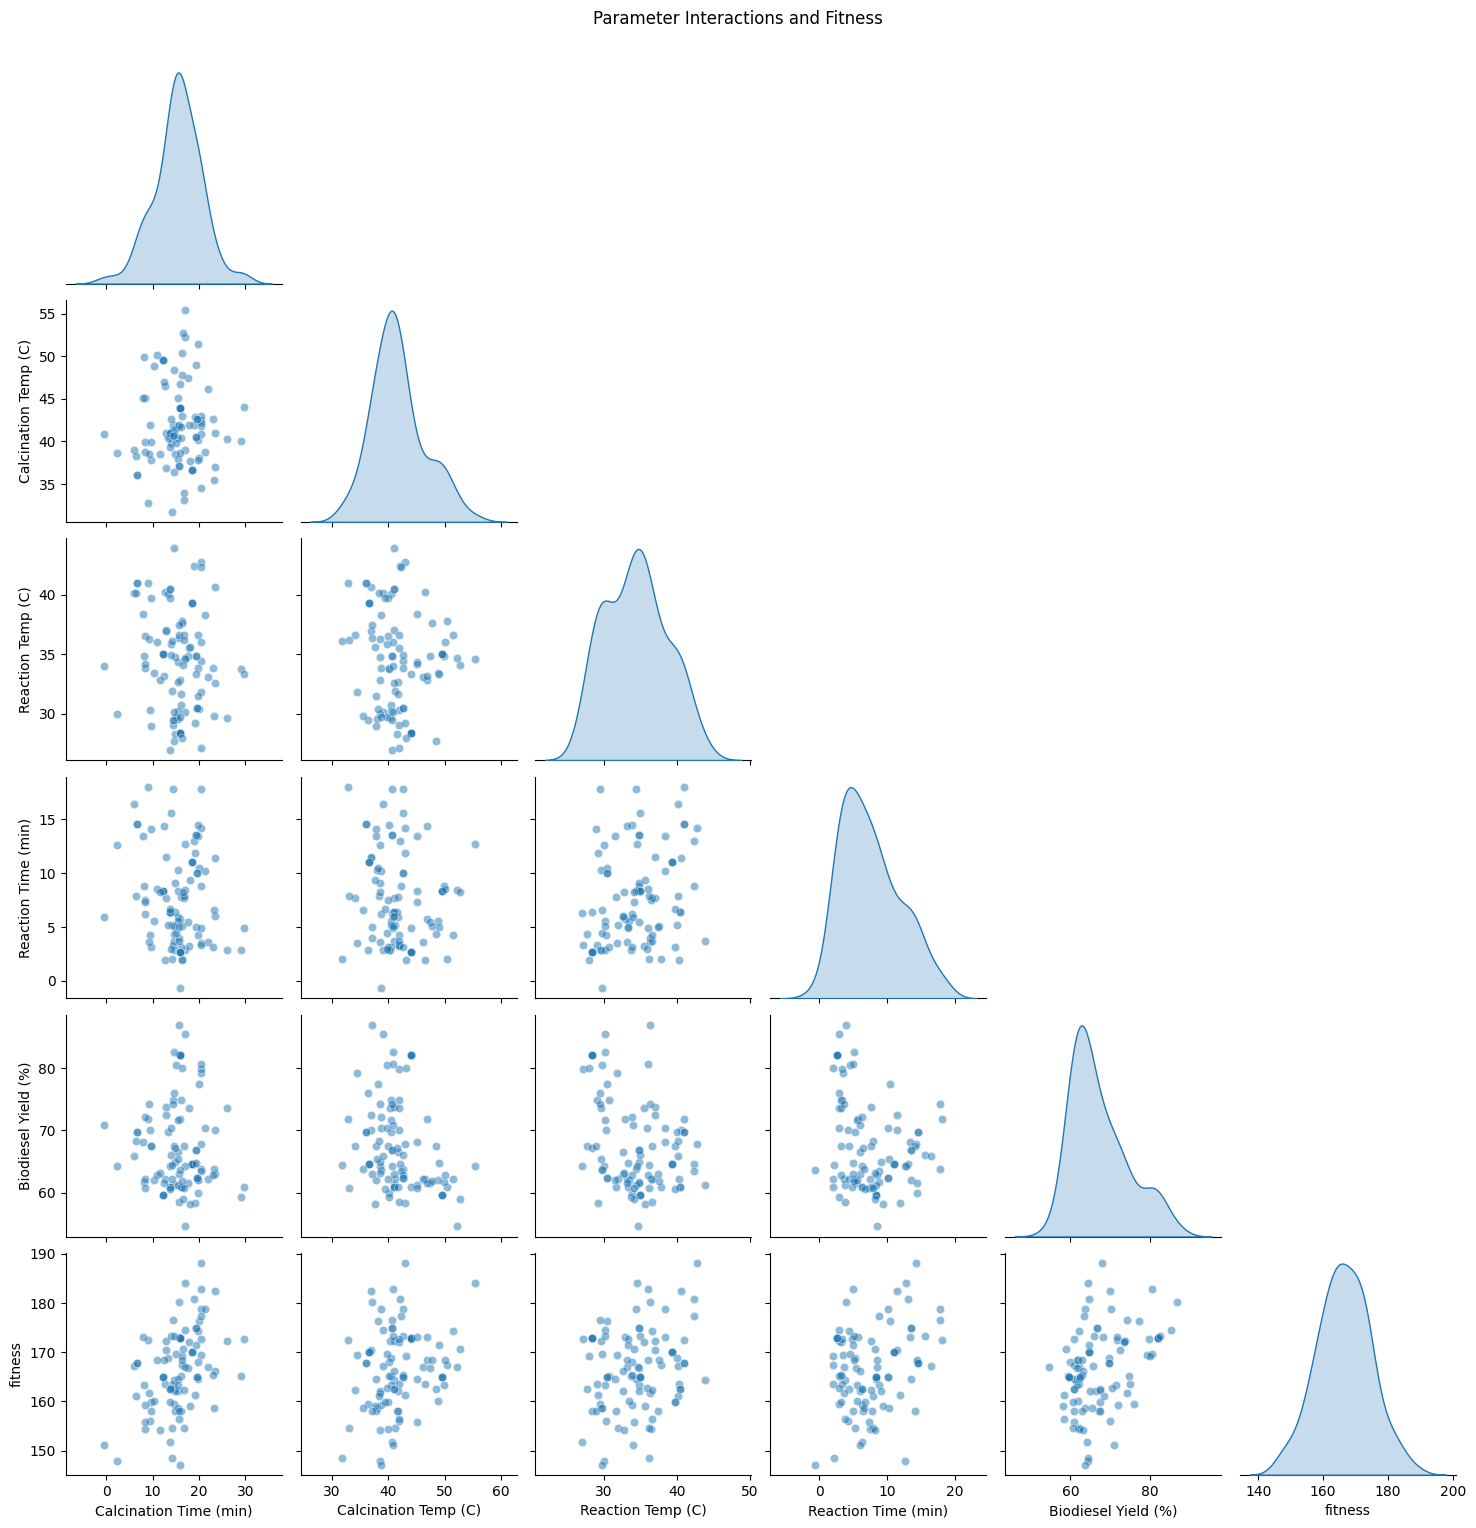

In [7]:
# Create a pair plot showing the relationships between parameters and fitness
sns.pairplot(df_results, diag_kind="kde", corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Parameter Interactions and Fitness", y=1.02)
plt.show()

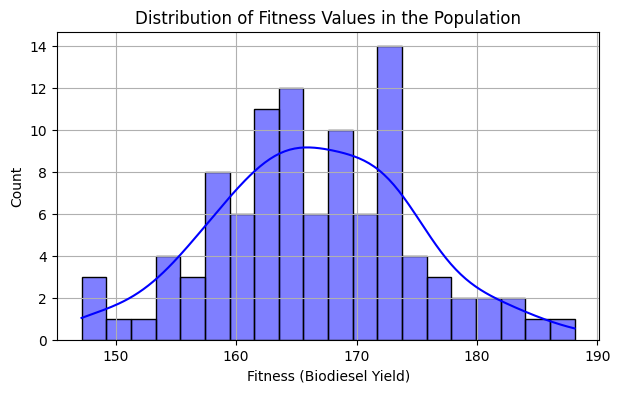

In [8]:
# Plot the distribution of fitness values
plt.figure(figsize=(7, 4))
sns.histplot(df_results['fitness'], kde=True, bins=20, color="blue")
plt.title("Distribution of Fitness Values in the Population")
plt.xlabel("Fitness (Biodiesel Yield)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

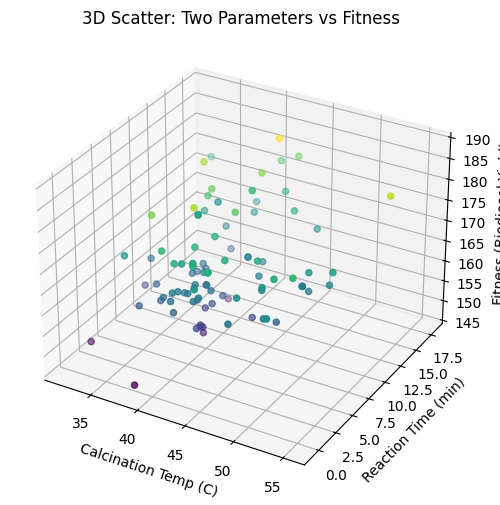

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Select two key parameters and fitness for 3D visualization
x_param = 'Calcination Temp (C)'
y_param = 'Reaction Time (min)'
z_fitness = 'fitness'

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(df_results[x_param], df_results[y_param], df_results[z_fitness], c=df_results[z_fitness], cmap='viridis')

# Label the axes
ax.set_xlabel(x_param)
ax.set_ylabel(y_param)
ax.set_zlabel('Fitness (Biodiesel Yield)')
plt.title("3D Scatter: Two Parameters vs Fitness")
plt.show()


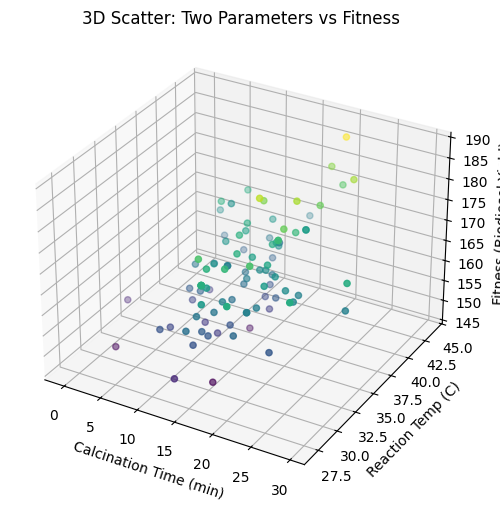

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Select two key parameters and fitness for 3D visualization
x_param = 'Calcination Time (min)'
y_param = 'Reaction Temp (C)'
z_fitness = 'fitness'

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(df_results[x_param], df_results[y_param], df_results[z_fitness], c=df_results[z_fitness], cmap='viridis')

# Label the axes
ax.set_xlabel(x_param)
ax.set_ylabel(y_param)
ax.set_zlabel('Fitness (Biodiesel Yield)')
plt.title("3D Scatter: Two Parameters vs Fitness")
plt.show()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Load data (replace 'file_path' with your file location in Jupyter Notebook)
data = pd.read_csv("H1.csv")

# Display first few rows
data.head()

,Run,Calcination Time (min),Calcination Temp (C),Reaction Temp (C),Reaction Time (min),Biodiesel Yield (%),Validation,Residual (%)
0,1,120,500,55,60,70.54,Training,0.110
1,2,240,500,55,80,74.22,Training,0.073
2,3,120,700,55,80,78.67,Training,0.073
3,4,240,700,55,60,68.13,Training,0.036
4,5,120,500,65,80,68.80,Training,0.073


In [14]:
# Extract features and target from the dataset
features = data[['Calcination Time (min)', 'Calcination Temp (C)', 'Reaction Temp (C)', 'Reaction Time (min)']]
target = data['Biodiesel Yield (%)']

# Normalize features for GA compatibility
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Define fitness function for GA (maximize biodiesel yield)
def fitness(individual):
    Calcination_time, Calcination_temp, Rxn_time, Rxn_temp = individual
    scaled_input = np.array([[Calcination_time, Calcination_temp, Rxn_time, Rxn_temp]])
    
    # Scale back to original data to find yield prediction
    input_data = scaler.inverse_transform(scaled_input)
    
    # Find nearest actual biodiesel yield from dataset (or apply model if needed)
    nearest_index = np.argmin(np.sum(np.abs(features.values - input_data), axis=1))
    yield_value = target.values[nearest_index]
    
    return -yield_value  # Negate to maximize yield (GA minimizes by default)

In [15]:
# Set up bounds for GA based on feature scaling (0-1 after scaling)
bounds = [(0, 1) for _ in range(scaled_features.shape[1])]

# Run the differential evolution GA algorithm
result = differential_evolution(fitness, bounds, maxiter=100, popsize=15, mutation=(0.5, 1), recombination=0.7)

# Convert the best scaled result back to original feature values
optimized_values = scaler.inverse_transform([result.x])
print("Optimized Parameters:", optimized_values)
print("Maximized Biodiesel Yield:", -result.fun)

Optimized Parameters: [[161.62264822 670.35456657  63.40294388  74.03181031]]
Maximized Biodiesel Yield: 78.67


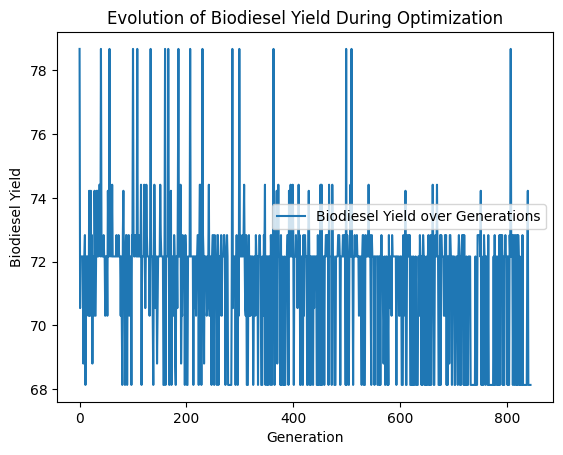

In [16]:
# Track history of yield values for visualization
yield_history = []

# Modify fitness function to log yield during each iteration
def fitness_log(individual):
    yield_value = -fitness(individual)
    yield_history.append(yield_value)
    return yield_value

# Re-run optimization with logging
result_with_log = differential_evolution(fitness_log, bounds, maxiter=100, popsize=15, mutation=(0.5, 1), recombination=0.7)

# Plot yield history
plt.plot(yield_history, label='Biodiesel Yield over Generations')
plt.xlabel('Generation')
plt.ylabel('Biodiesel Yield')
plt.title('Evolution of Biodiesel Yield During Optimization')
plt.legend()
plt.show()

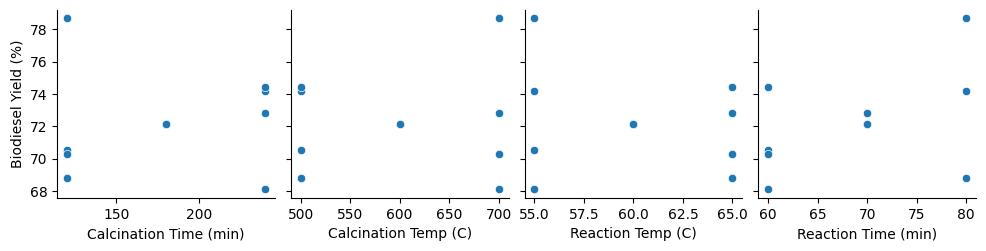

C:\Users\macbook\AppData\Local\Temp\ipykernel_6388\737467660.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


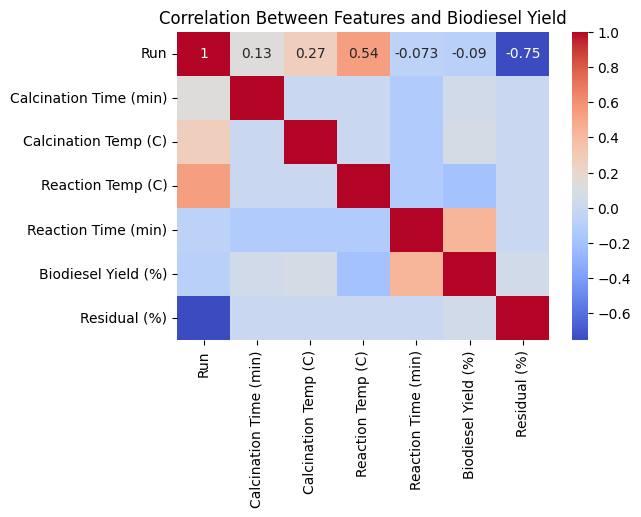

In [18]:
import seaborn as sns

# Pair plot to see relationships between variables and biodiesel yield
sns.pairplot(data, x_vars=['Calcination Time (min)', 'Calcination Temp (C)', 'Reaction Temp (C)', 'Reaction Time (min)'], y_vars='Biodiesel Yield (%)', kind='scatter')
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features and Biodiesel Yield')
plt.show()

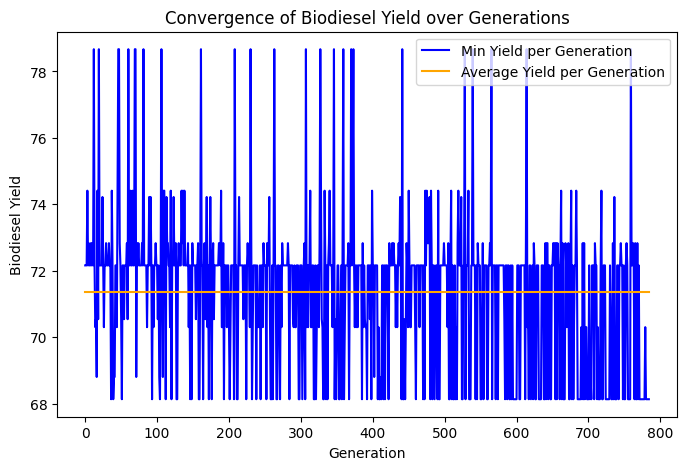

In [31]:
# Convergence plot to show minimum and average yields over generations
min_yield_per_gen = []
avg_yield_per_gen = []

# Modify fitness function to log yields during each generation
def fitness_track_convergence(individual):
    yield_value = -fitness(individual)
    min_yield_per_gen.append(yield_value)
    avg_yield_per_gen.append(np.mean(yield_history))
    return yield_value

# Re-run optimization with logging
result_convergence = differential_evolution(fitness_track_convergence, bounds, maxiter=100, popsize=15, mutation=(0.5, 1), recombination=0.7)

# Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(min_yield_per_gen, label='Min Yield per Generation', color='blue')
plt.plot(avg_yield_per_gen, label='Average Yield per Generation', color='orange')
plt.xlabel('Generation')
plt.ylabel('Biodiesel Yield')
plt.title('Convergence of Biodiesel Yield over Generations')
plt.legend()
plt.show()

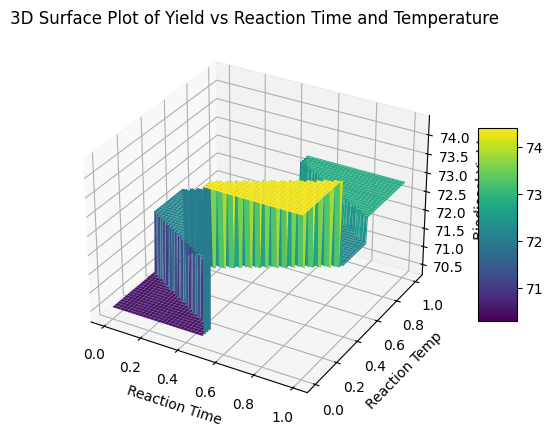

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Choose two variables (e.g., rxn time and rxn temp) and fix others to mean values
rxn_time_range = np.linspace(scaled_features[:, 0].min(), scaled_features[:, 0].max(), 100)
rxn_temp_range = np.linspace(scaled_features[:, 1].min(), scaled_features[:, 1].max(), 100)

# Create meshgrid
X, Y = np.meshgrid(rxn_time_range, rxn_temp_range)
Z = np.array([fitness([x, y, np.mean(scaled_features[:, 2]), np.mean(scaled_features[:, 3])]) for x, y in zip(X.ravel(), Y.ravel())])

# Reshape to match meshgrid dimensions
Z = Z.reshape(X.shape)

# Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, -Z, cmap=cm.viridis, edgecolor='none')
ax.set_xlabel('Reaction Time')
ax.set_ylabel('Reaction Temp')
ax.set_zlabel('Biodiesel Yield')
ax.set_title('3D Surface Plot of Yield vs Reaction Time and Temperature')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

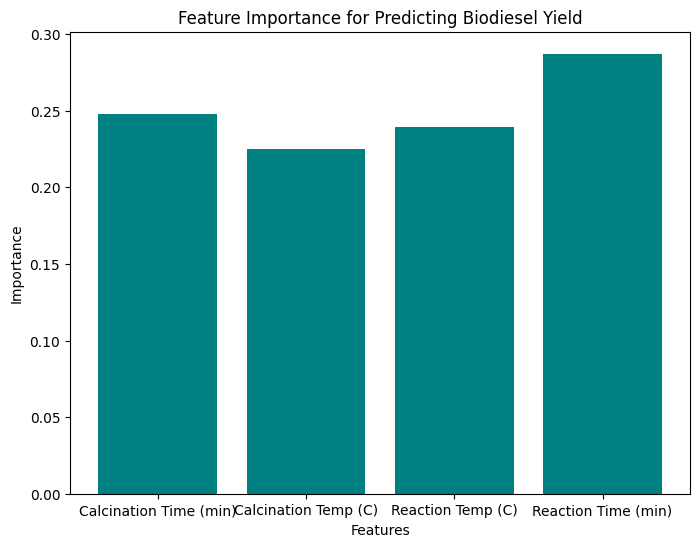

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Train a model to predict biodiesel yield and get feature importances
model = RandomForestRegressor()
model.fit(scaled_features, target)
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(features.columns, importances, color='teal')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Predicting Biodiesel Yield')
plt.show()

Statistics for each factor:

                              Mean     Variance  Standard Deviation    Min  \
Calcination Time (min)  180.000000  2880.000000           53.665631  120.0   
Calcination Temp (C)    600.000000  8000.000000           89.442719  500.0   
Reaction Temp (C)        60.000000    20.000000            4.472136   55.0   
Reaction Time (min)      69.090909    69.090909            8.312094   60.0   

                          Max  Log (Mean)  
Calcination Time (min)  240.0    5.192957  
Calcination Temp (C)    700.0    6.396930  
Reaction Temp (C)        65.0    4.094345  
Reaction Time (min)      80.0    4.235423  


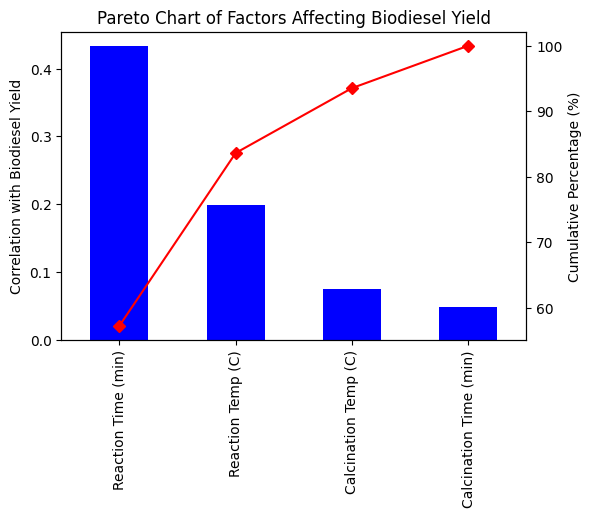

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('H1.csv')

# Drop 'Run' and 'Residual (%)' columns
df = data.drop(columns=['Run', 'Residual (%)', 'Validation'], errors='ignore')

# Calculate correlations of each factor with biodiesel yield
correlations = df.corr()["Biodiesel Yield (%)"].drop("Biodiesel Yield (%)").abs()

# Sort correlations for Pareto chart
sorted_correlations = correlations.sort_values(ascending=False)

# Plot Pareto chart
fig, ax1 = plt.subplots(figsize=(6, 4))

# Bar plot for the factors
sorted_correlations.plot(kind="bar", color="blue", ax=ax1)
ax1.set_ylabel("Correlation with Biodiesel Yield")
ax1.set_title("Pareto Chart of Factors Affecting Biodiesel Yield")

# Cumulative percentage line plot
ax2 = ax1.twinx()
cumulative_percentage = sorted_correlations.cumsum() / sorted_correlations.sum() * 100
cumulative_percentage.plot(color="red", marker="D", ax=ax2)
ax2.set_ylabel("Cumulative Percentage (%)")

# Function to calculate statistics
def calculate_statistics(df):
    stats = pd.DataFrame({
        "Mean": df.mean(),
        "Variance": df.var(),
        "Standard Deviation": df.std(),
        "Min": df.min(),
        "Max": df.max(),
        "Log (Mean)": np.log(df.mean().replace(0, np.nan))  # Avoid log(0) by replacing 0 with NaN
    }).drop("Biodiesel Yield (%)", errors='ignore')  # Exclude target variable from stats if needed
    return stats

# Calculate statistics for each factor
statistics = calculate_statistics(df)

# Display the statistics
print("Statistics for each factor:\n")
print(statistics)

# Show plot
plt.show()
